<font size="3"><b>os.path package provides an easy way to manipulate paths in python</b></font>

In [3]:
import os.path
import glob
import numpy as np
import argparse
import subprocess
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import psrchive

In [5]:
os.chdir('/home/psr/eleni/Fundi_toturial')

In [7]:
pwd = os.getcwd()

In [8]:
os.listdir(pwd)

['.ipynb_checkpoints',
 'astropy_gaussian_fitting.ipynb',
 'ppdot.csv',
 'Pandas_examples.ipynb',
 'psrchive_in_python.ipynb',
 'B1855+09',
 'gapminder.csv',
 'Fundi_tutorial.ipynb',
 'PPdot_diagram.csv']

In [9]:
os.chdir(pwd+"/B1855+09/P217-3")

In [10]:
pwd = os.getcwd()
print pwd
os.listdir(pwd)

/home/psr/eleni/Fundi_toturial/B1855+09/P217-3


['2012', '2013']

<font size="3"><b>Search for specific files in a directory with glob.glob module</b></font>

In [14]:
for dir in glob.glob('201*'):
    print dir
    for clean in glob.glob(dir+"/*clean"):
        print clean
        arch = psrchive.Archive_load(clean)
        print arch.get_centre_frequency()
        bashCommand = "vap -n -c length,freq,bw,mjd,period,dm,nbin,nchan "+clean
        process = subprocess.Popen(bashCommand.split(), stdout=subprocess.PIPE)
        output, error = process.communicate()
        print output.split()

2012
2012/B1855+09_ASTERIX_P217-3_20121209_61780.clean
1347.5
['B1855+09_ASTERIX_P217-3_20121209_61780.clean', '1670.000', '1347.500', '200.000', '56270.715046', '0.0053624753131476', '13.295200', '1024', '128']
2013
2013/B1855+09_ASTERIX_P217-3_20130106_38420.clean
1347.5
['B1855+09_ASTERIX_P217-3_20130106_38420.clean', '1670.000', '1347.500', '200.000', '56298.444676', '0.0053623562786023', '13.295200', '1024', '128']


<font size="3"><b>Load a file with psrchive

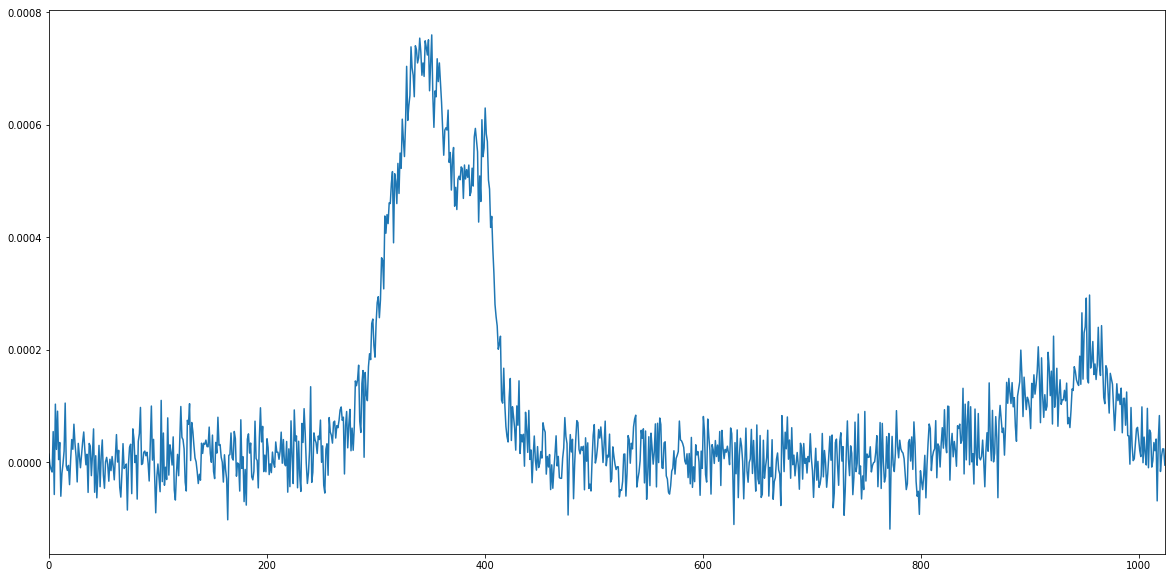

In [16]:
arch = psrchive.Archive_load("2012/B1855+09_ASTERIX_P217-3_20121209_61780.clean")
arch.fscrunch()
arch.tscrunch()
arch.pscrunch()
arch.remove_baseline()
data = arch.get_data()
#########
initial_archive = data[0, 0, 0, :]

fig1 = plt.figure(1, figsize=(20,10))
plt.plot(np.linspace(0, len(data[0, 0, 0, :]), len(data[0, 0, 0, :])), initial_archive)
plt.xlim(0, arch.get_nbin())
plt.show()

128


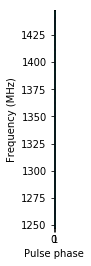

In [46]:
import pylab
arch = psrchive.Archive_load('2012/B1855+09_ASTERIX_P217-3_20121209_61780.clean')
#arch.bscrunch_to_nbin(512)
arch.dedisperse()
#arch.fscrunch_to_nchan(64)
arch.remove_baseline()
arch.convert_state('Stokes')
data = arch.get_data()
freq_lo = arch.get_centre_frequency() - arch.get_bandwidth()/2.0
freq_hi = arch.get_centre_frequency() + arch.get_bandwidth()/2.0
print len(data[:,0,:,:].mean(0))
plt.imshow(data[:,0,:,:].mean(0), extent=(0,1,freq_lo,freq_hi))
plt.xlabel('Pulse phase')
plt.ylabel('Frequency (MHz)')